# Traitement du Signal - TP5 : Filtrage

---

Vous être des maîtres de la convolution et de la transformée de Fourier depuis maintenant quelques jours. Votre mission du jour : mettre à profit votre expertise pour filtrer les vilaines fréquences des signaux. Je compte sur vous !

In [1]:
# A COMPLETER
# Import des librairies
import numpy as np
from matplotlib import pyplot as plt

## Exercice 1 : Dans un monde parfait, les filtres sont idéaux

Pour commencer, partons sur les filtres idéaux. Comme vous l'avez vu en cours, ce sont des filtres qui sont facilement définissables en fréquentiel, mais qui ne sont malheureusement pas physiquement réalisables. Cependant, ils restent intéressants, et c'est un bon début pour se représenter le principe de filtrage.

Tout d'abord, avant de filtrer, il nous faut un signal. Pour cela, on va partir sur une somme de sinusoïdes, afin de voir très distinctement les fréquences dans le spectre d'amplitude. Voici ci-dessous une fonction qui effectue une somme de sinus à des fréquences, amplitudes et phases définies en paramètres dans une liste, ainsi qu'un axe temporel.

In [2]:
# Fonction somme de sinus

def somme_sinus(temps,parameters):
    """
    Construit un signal représentant une somme de sinus, lié à un axe temporel
    temps: tableau 1D NumPy, représentant l'axe temporel
    parameters: liste [frequence, amplitude, phase], contenant les paramètres de chaque sinus à intégrer dans la somme
    """
    # Initialisation du signal
    signal = np.zeros_like(temps)
    
    # On itère sur la liste de paramètres
    for p in parameters:
        freq, amp, phase = p
        signal+= amp*np.sin(2*np.pi*freq*temps + phase)
    return signal

Voici un exemple d'utilisation de la fonction ici pour la création du signal suivant sur un axe temporel allant de 0 à 2 secondes avec un pas d'échantillonage de 0.001 secondes :

\begin{equation*}
    s(t) = 5 \cdot sin(2 \pi f_0 t) + 2 \cdot sin(2 \pi f_1 t + \frac{\pi}{4})
\end{equation*}

Avec ici, $f_0 = 10 Hz$ et $f_1 = 25 Hz$ 

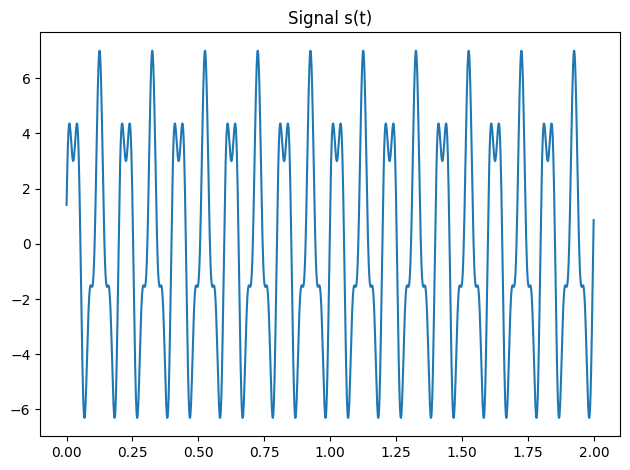

In [3]:
# Création de l'axe temporel
Te = 0.001
temps_s = np.arange(0,2,Te)

# Définition des paramètres de la somme de sinus 
# Chaque élément de la liste correspond aux paramètres de chaque sinus, lui aussi sous la forme d'une liste [frequence, amplitude, phase]
parameters_s = [[10, 5, 0],
                [25, 2, np.pi/4]]

# Création du signal s
signal_s = somme_sinus(temps_s, parameters_s)

# Affichage du signal
plt.figure()
plt.plot(temps_s, signal_s)
plt.title("Signal s(t)")
plt.tight_layout()
plt.show()

Créez maintenant le signal suivant :

\begin{equation*}
    x(t) = 3 \cdot sin(2 \pi f_0 t - \frac{\pi}{2}) + sin(2 \pi f_1 t + \frac{\pi}{3}) + 0.5 \cdot sin(2 \pi f_2 t) + 0.1 \cdot sin(2 \pi f_3 t + \frac{\pi}{6})
\end{equation*}

Avec $f_0 = 5 Hz$, $f_1 = 50 Hz$, $f_2 = 100 Hz$ et $f_3 = 200 Hz$. Le signal évoluera entre 0 et 1 secondes avec un pas de 0.001 secondes. Affichez ensuite le signal.

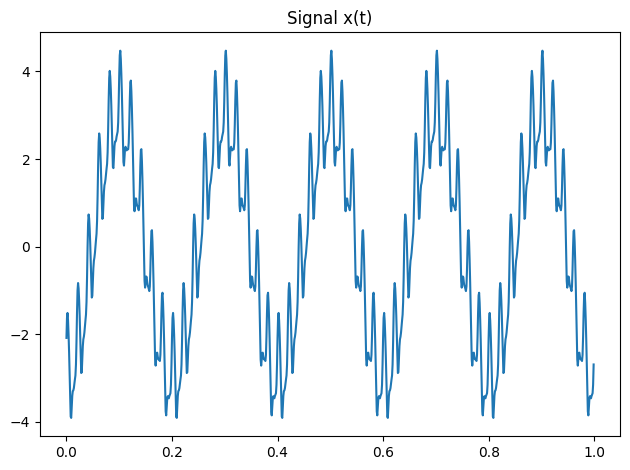

In [4]:
# A COMPLETER
# Création du signal x et affichage

Te = 0.001
t = np.arange(0,1,Te)

parameters_x = [[5, 3, -np.pi/2],
                [50, 1, np.pi/3],
                [100, 0.5, 0],
                [200, 0.1, np.pi/6]]

x = somme_sinus(t, parameters_x)

plt.figure()
plt.plot(t, x)
plt.title("Signal x(t)")
plt.tight_layout()
plt.show()

Calculez $X(f)$, la transformée de Fourier réelle de $x(t)$ et affichez le spectre d'amplitude

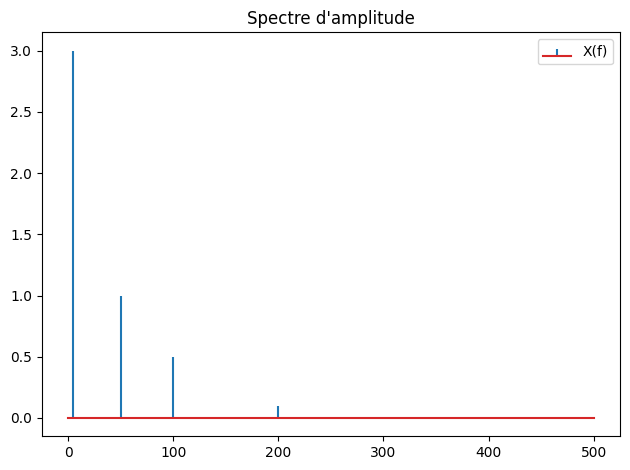

In [5]:
# A COMPLETER
# FFT réelle de x(t)
X = np.fft.rfft(x)
freq_X = np.fft.rfftfreq(len(t),Te)

amplitude_X = np.abs(X)*2/len(t)

plt.figure()
plt.stem(freq_X,amplitude_X,label='X(f)',markerfmt=' ')
plt.legend()
plt.title("Spectre d'amplitude")
plt.tight_layout()
plt.show()

On va pouvoir créer notre premier filtre : un filtre passe-bas. La construction d'un filtre idéal se fait dans le domaine fréquentiel, donc on va design le filtre $H(f)$ pour l'appliquer ensuite directement sur $X(f)$.

Calculez le filtre passe-bas idéal $H(f)$, avec une fréquence de coupure $f_c = 20 Hz$. Affichez ensuite dans deux sous-figures les spectres d'amplitude de $X(f)$ et $H(f)$.

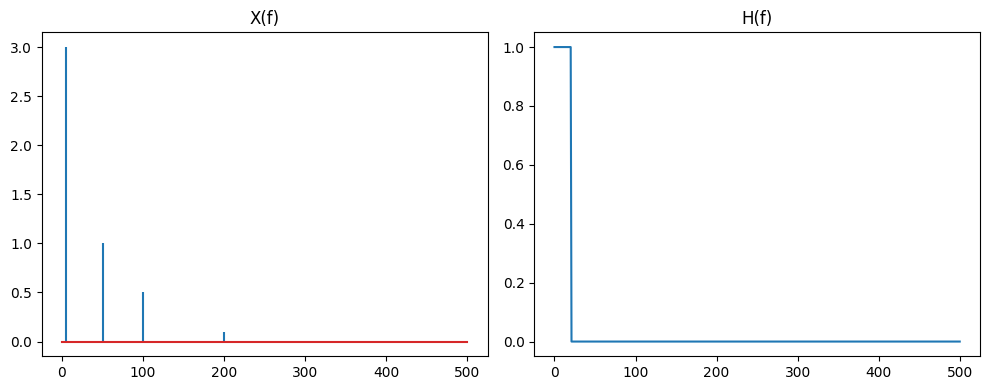

In [6]:
# A COMPLETER
# Création du filtre passe-bas H(f)
fc = 20
H = np.ones_like(amplitude_X)
H[freq_X>fc]=0

plt.subplots(1,2,figsize=(10,4))
plt.title("Spectre d'amplitude")
plt.subplot(121)
plt.stem(freq_X,amplitude_X,markerfmt=' ')
plt.title('X(f)')
plt.subplot(122)
plt.plot(freq_X, H)
plt.title('H(f)')
plt.tight_layout()
plt.show()


**_QUESTION :_** Que devrait donne théoriquement l'application du filtre passe-bas $H(f)$ sur le signal $X(f)$ ?

**_REPONSE :_** Le signal filtré n'aura plus que la fréquence $f_0 = 5 Hz$, car les autres sinus ont une fréquence supérieure à la fréquence de coupure $f_c$. Le signal résultant devrait être donc $y(t) = 3 \cdot sin(2 \pi f_0 t - \frac{\pi}{2})$.

Calculez maintenant le signal filtré $Y(f) = X(f) \cdot H(f)$ et affichez le spectre d'amplitude

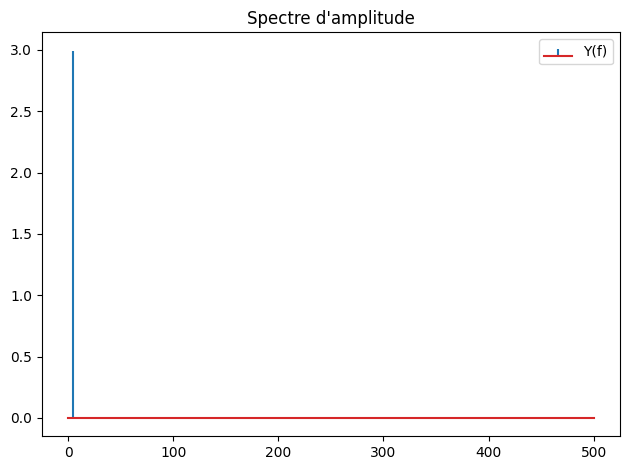

In [7]:
# A COMPLETER
# Calcul de Y(f) et affichage du spectre d'amplitude
Y = X*H
amplitude_Y = np.abs(Y)/len(Y)
plt.figure()
plt.stem(freq_X,amplitude_Y,label='Y(f)',markerfmt=' ')
plt.legend()
plt.title("Spectre d'amplitude")
plt.tight_layout()
plt.show()

Effectuez maintenant une FFT réelle inverse de $Y(f)$ pour retrouver votre signal filtré $y(t)$. Comparez le résultat avec ce que vous devriez avoir théoriquement (construisez ce signal théorique en temporel), et affichez sur un même graphique les deux signaux.

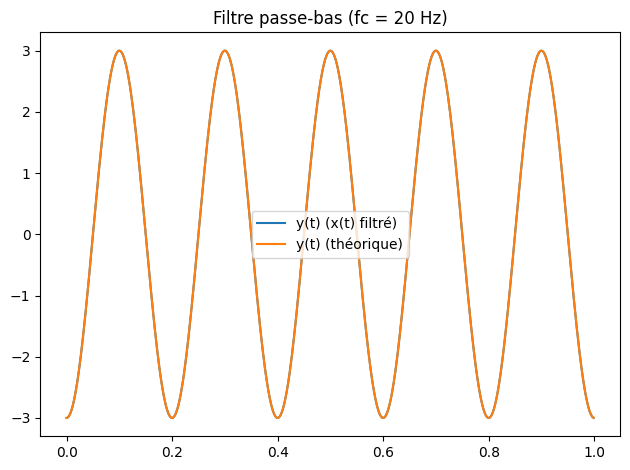

In [8]:
# A COMPLETER
# FFT réelle inverse, construction du signal filtré théorique et affichage des deux signaux

y = np.fft.irfft(Y)

parameters_y_theorique = [[5, 3, -np.pi/2]]
y_theorique = somme_sinus(t,parameters_y_theorique)

# Affichage des signaux
plt.figure()
plt.plot(t,y,label='y(t) (x(t) filtré)')
plt.plot(t,y_theorique,label='y(t) (théorique)')
plt.legend()
plt.title("Filtre passe-bas (fc = 20 Hz)")
plt.tight_layout()
plt.show()

Regroupez le code que vous avez produit précédemment pour créer une fonction de filtre passe-bas, prenant en entrée un signal à filtrer, son temps d'échantillonage et une fréquence de coupure.

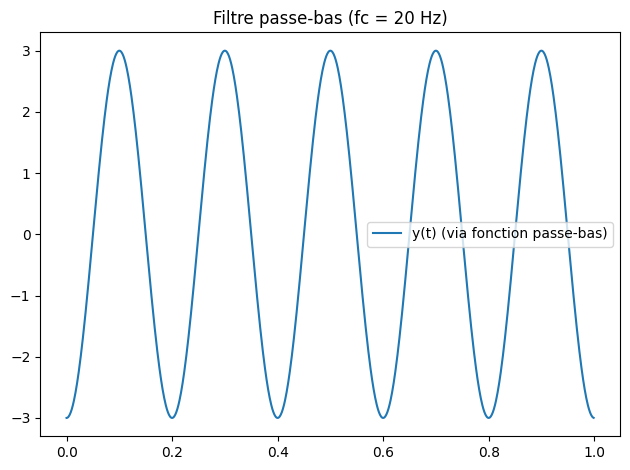

In [9]:
# A COMPLETER
# Fonction de filtre passe-bas

def filtre_passe_bas(s,fc,Te):
    """
    Effectue un filtre passe-bas à la fréquence de coupure fc sur le signal s
    s : tableau 1D NumPy, le signal à filtrer
    fc : int/float, la fréquence de coupure du filtre passe-bas
    Te : float, le temps d'échantillonage du signal
    """
    S = np.fft.rfft(s)
    freq_S = np.fft.rfftfreq(len(s),Te)
    
    H = np.ones_like(freq_S)
    H[freq_S>fc]=0
    Y = S*H
    return np.fft.irfft(Y)

plt.figure()
plt.plot(t,filtre_passe_bas(x, 20, Te),label='y(t) (via fonction passe-bas)')
plt.legend()
plt.title("Filtre passe-bas (fc = 20 Hz)")
plt.tight_layout()
plt.show()

Super ! Vous avez votre première fonction de filtrage ! Développez dans le même esprit maintenant les fonctions de filtrage suivant:
- Filtrage passe-haut
- Filtrage passe-bande
- Filtrage coupe-bande

Après développement, testez vos fonctions sur le signal $x(t)$ et affichez sur le même graphique le résultat du filtrage ainsi que le résultat théorique en fonction de votre filtre et de vos paramètres.

In [10]:
# A COMPLETER
# Développement des filtres passe-haut, passe-bande et coupe-bande

def filtre_passe_haut(s,fc,Te):
    """
    Effectue un filtre passe-haut à la fréquence de coupure fc sur le signal s
    s : tableau 1D NumPy, le signal à filtrer
    fc : int/float, la fréquence de coupure du filtre passe-haut
    Te : float, le temps d'échantillonage du signal
    """
    S = np.fft.rfft(s)
    freq_S = np.fft.rfftfreq(len(s),Te)
    
    H = np.ones_like(freq_S)
    H[freq_S<fc]=0
    Y = S*H
    return np.fft.irfft(Y)

def filtre_passe_bande(s,fc1,fc2,Te):
    """
    Effectue un filtre passe-bande aux fréquences de coupure fc1 et fc2 sur le signal s
    s : tableau 1D NumPy, le signal à filtrer
    fc1,fc2 : int/float, les fréquences de coupure du filtre passe-bande
    Te : float, le temps d'échantillonage du signal
    """
    # On trie fc1 et fc2 de sorte que fc1<fc2
    if fc2<fc1:
        fc1, fc2 = fc2, fc1
    
    S = np.fft.rfft(s)
    freq_S = np.fft.rfftfreq(len(s),Te)
    
    H = np.ones_like(freq_S)
    H[np.logical_or(freq_S<fc1, freq_S>fc2)]=0
    Y = S*H
    return np.fft.irfft(Y)

def filtre_coupe_bande(s,fc1,fc2,Te):
    """
    Effectue un filtre coupe-bande aux fréquences de coupure fc1 et fc2 sur le signal s
    s : tableau 1D NumPy, le signal à filtrer
    fc1,fc2 : int/float, les fréquences de coupure du filtre coupe-bande
    Te : float, le temps d'échantillonage du signal
    """
    # On trie fc1 et fc2 de sorte que fc1<fc2
    if fc2<fc1:
        fc1, fc2 = fc2, fc1

    S = np.fft.rfft(s)
    freq_S = np.fft.rfftfreq(len(s),Te)
    
    H = np.ones_like(freq_S)
    H[np.logical_and(freq_S>=fc1, freq_S<=fc2)]=0
    Y = S*H
    return np.fft.irfft(Y)

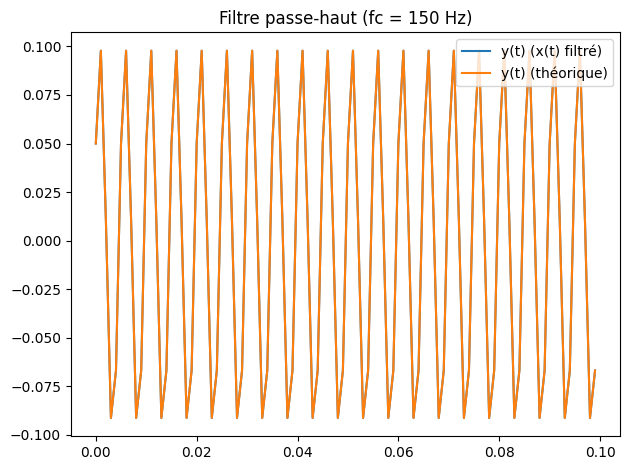

In [11]:
# A COMPLETER
# Application du filtre passe-haut sur x(t) à fc = 150 Hz

y = filtre_passe_haut(x, 150, Te)

parameters_y_theorique = [[200, 0.1, np.pi/6]]
y_theorique = somme_sinus(t, parameters_y_theorique)

# Sur la figure, on ne voit pas vraiment bien à cause de la nature du signal (200 Hz) si on trace sur t
# On définit bmin et bmax pour observer une portion plus rédiote, afin de mieux comparer

bmin=0
bmax=100
plt.figure()
plt.plot(t[bmin:bmax],y[bmin:bmax],label='y(t) (x(t) filtré)')
plt.plot(t[bmin:bmax],y_theorique[bmin:bmax],label='y(t) (théorique)')
plt.title("Filtre passe-haut (fc = 150 Hz)")
plt.legend()
plt.tight_layout()
plt.show()


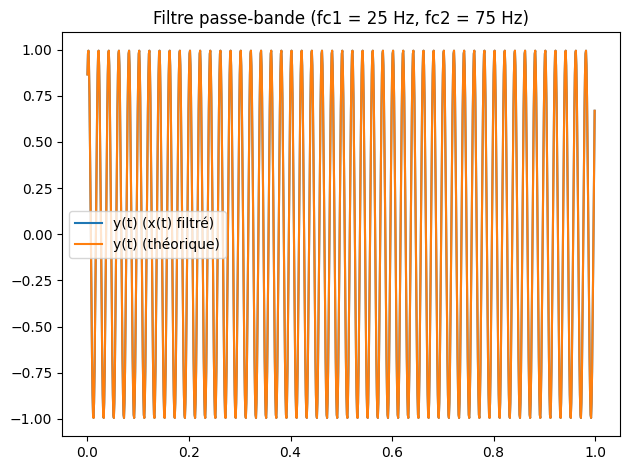

In [12]:
# A COMPLETER
# Application du filtre passe-bande sur x(t) à fc1 = 25 Hz et fc2 = 75 Hz

y = filtre_passe_bande(x, 25, 75, Te)

parameters_y_theorique = [[50, 1, np.pi/3]]
y_theorique = somme_sinus(t, parameters_y_theorique)


bmin=0
bmax=len(t)
plt.figure()
plt.plot(t[bmin:bmax],y[bmin:bmax],label='y(t) (x(t) filtré)')
plt.plot(t[bmin:bmax],y_theorique[bmin:bmax],label='y(t) (théorique)')
plt.title("Filtre passe-bande (fc1 = 25 Hz, fc2 = 75 Hz)")
plt.legend()
plt.tight_layout()
plt.show()


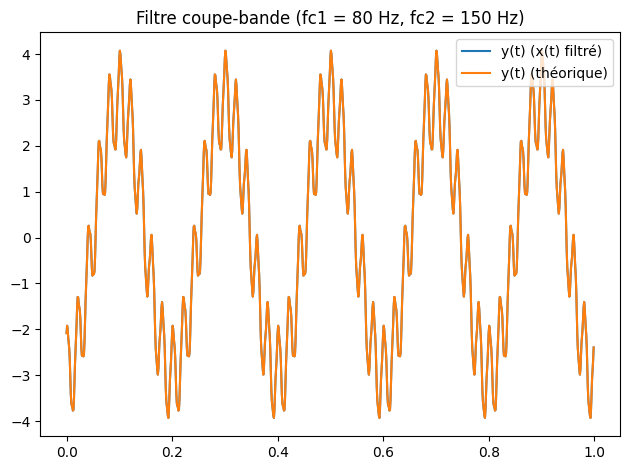

In [13]:
# A COMPLETER
# Application du filtre coupe-bande sur x(t) à fc1 = 80 Hz et fc2 = 150 Hz

y = filtre_coupe_bande(x, 80, 150, Te)

parameters_y_theorique = [[5, 3, -np.pi/2],
                          [50, 1, np.pi/3],
                          [200, 0.1, np.pi/6]]
y_theorique = somme_sinus(t, parameters_y_theorique)


bmin=0
bmax=len(t)
plt.figure()
plt.plot(t[bmin:bmax],y[bmin:bmax],label='y(t) (x(t) filtré)')
plt.plot(t[bmin:bmax],y_theorique[bmin:bmax],label='y(t) (théorique)')
plt.title("Filtre coupe-bande (fc1 = 80 Hz, fc2 = 150 Hz)")
plt.legend()
plt.tight_layout()
plt.show()


## Exercice 2 : Plancherel ! Encore toi !

Pour ce deuxième exercice, on va reprendre le même signal $x(t)$ et appliquer le même filtre passe-bas à $f_c = 20 Hz$. Cependant, on va créer le filtre en fréquentiel mais l'appliquer sur $x(t)$ en temporel par convolution.

Reprenez $H(f)$, le filtre passe-bas à $f_c = 20 Hz$, construit précédemment, et effectuez une transformée de Fourier inverse réelle pour obtenir $h(t)$, et tracez le signal.

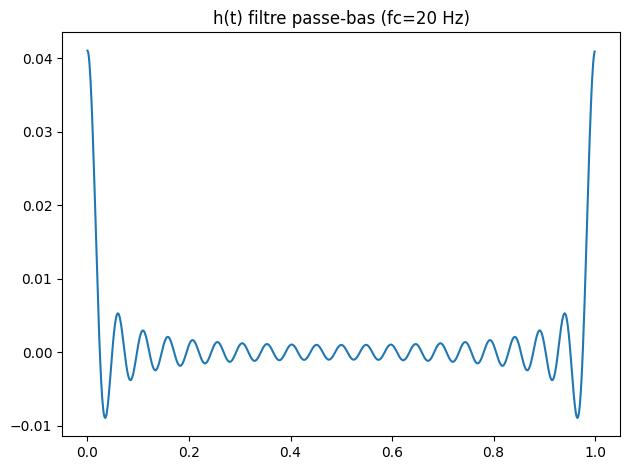

In [14]:
# A COMPLETER
# FFT réelle inverse de H(f) et affichage
h = np.fft.irfft(H)
plt.figure()
plt.plot(t, h)
plt.title("h(t) filtre passe-bas (fc=20 Hz)")
plt.tight_layout()
plt.show()


**_QUESTION :_** Est-ce que le filtre temporel vous paraît correct ? Que devrait-on avoir en théorie ?

**_REPONSE :_** En théorie, on devrait avoir une fonction sinus cardinal centrée sur 0. Cependant, ici, on obtient dans un premier temps la partie à temps positif, puis la partie à temps négatif.

Sans vous poser de question, appliquez le filtre $h(t)$ au signal $x(t)$ via convolution et affichez le résultat en comparant avec $y(t)$ (ce que vous devriez avoir en théorie).

*Note : attention, le produit de convolution renvoit un signal de taille différente que $x(t)$, donc adaptez votre axe temporel*

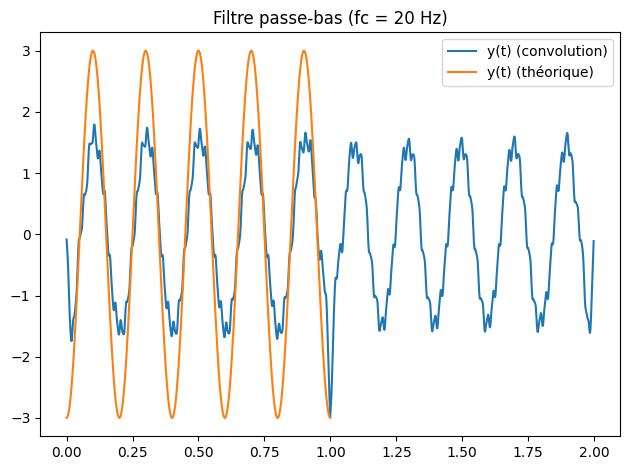

In [15]:
# A COMPLETER
# Convolution de x(t) avec h(t) et comparaison graphique avec y(t) théorique
y = np.convolve(x,h)

# Après convolution, la fréquence d'échantillonage ne varie pas
# De ce fait, on peut retrouver l'axe temporel de y en fonction de la taille du tableau, et le temps d'échantillonage
t_y = np.arange(0,len(y)*Te,Te) 

parameters_y_theorique = [[5, 3, -np.pi/2]]
y_theorique = somme_sinus(t,parameters_y_theorique)

# Affichage des signaux
plt.figure()
plt.plot(t_y,y,label='y(t) (convolution)')
plt.plot(t,y_theorique,label='y(t) (théorique)')
plt.legend()
plt.title("Filtre passe-bas (fc = 20 Hz)")
plt.tight_layout()
plt.show()

**_QUESTION :_** Que constatez-vous ? Quelles sont les points communs et différences entre le théorique et ce que vous avez calculé via convolution ?

**_REPONSE :_** On remarque plusieurs grosses différences :
- Le résultat de la convolution évolue deux fois plus longtemps que le résultat théorique. Au vu de la nature du calcul, c'est logique
- Le résultat de la convolution a une amplitude significativement plus faible que le résultat théorique.
- Le résultat de la convolution est significativement plus bruité que le résultat théorique.

On remarque un seul point commun : les phases des deux signaux semblent similaires.

Le résultat obtenu, malgré qu'il ne soit pas terrible, est normal, car on a oublié un point important. Ici, notre filtre $h(t)$ est idéal, est au vu de la nature du filtre, la réponse impulsionnelle du filtre n'est **pas causale**. De ce fait, on devrait avoir un filtre évoluant non pas de 0 à 1 secondes mais de -0.5 à 0.5 secondes. Il faut donc le recentrer via la fonction **fftshift**.

---

**_EXPLICATION COMPLETE DU COMPORTEMENT DE LA FFT INVERSE EN CAS NON CAUSAL :_**

*Lors de la transformée de Fourier inverse, le calcul effectué est le suivant:*

\begin{equation*}
    h[n]= \frac{1}{N} \sum_{k=0}^{N-1} H[k] e^{j2πkn/N}
\end{equation*}

*Ici $N$ est la taille de $h(t)$ (ou $H(f)$), et le calcul se fait donc pour $n$ allant de 0 à $N-1$. Si vous regardez la partie exponentielle du calcul, vous vous rendrez compte qu'elle rend le signal de sortie N-périodique. On ne le voit pas car $h(t)$ est de taille $N$, mais le signal ressorti est bien périodique en $N$.*

*De ce fait, le calcul réalisé est pour $h(t)$ évoluant de 0 à $(N-1) \times T_e$ secondes. Cependant, notre $h(t)$ n'étant pas causal, il faut le centrer pour qu'il évolue de $-\frac{N \times T_e}{2}$ à $\frac{N \times T_e}{2}$ secondes. Pour cela, nous allons utiliser la fonction fftshift, qu'on avait précédemment utilisé pour la FFT non réelle (TP3 exercice 2). La fonction fftshift sert à recentrer un vecteur périodique. Elle est utilisée généralement en fréquentiel pour centrer la fréquence nulle, mais ici, on l’utilise sur le signal temporel du filtre pour replacer le temps zéro au centre de la réponse impulsionnelle.*

---

Utilisez la fonction fftshift pour recentrer $h(t)$, calculez le bon axe temporel, et affichez le signal.

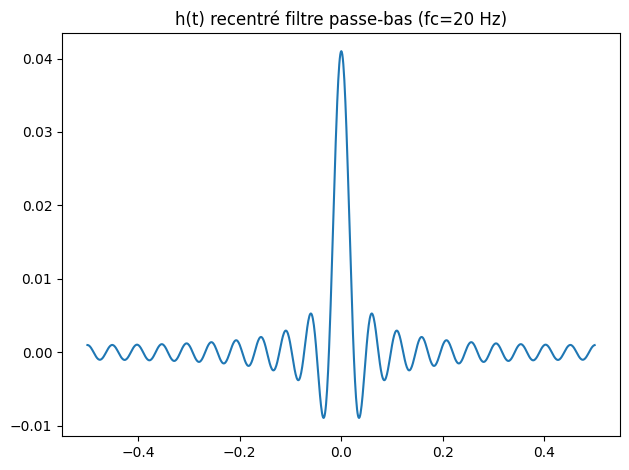

In [16]:
# A COMPLETER
# Recentrage de h(t) et affichage

h_centered = np.fft.fftshift(np.fft.irfft(H))
t_centered = np.arange(-len(h)*Te/2,len(h)*Te/2,Te)

plt.figure()
plt.plot(t_centered, h_centered)
plt.title("h(t) recentré filtre passe-bas (fc=20 Hz)")
plt.tight_layout()
plt.show()

---
**_Note importante :_**

*Dans le cadre de cet exercice, on a utilisé fftshift car notre filtre était non causal. Par la suite, nous n'utiliserons plus fftshift. La raison est que lorsqu'on a un filtre idéal non causal, on filtre nos signaux en fréquentiel, comme durant l'exercice 1. Pour les filtres réels, le filtrage se fait bien en temporel, mais au vu de la nature du filtre (causal), il n'y a aucun recentrage à faire.*

---

Appliquez maintenant le filtre $h(t)$ recentré sur $x(t)$ via convolution et affichez le résultat final du signal filtré.

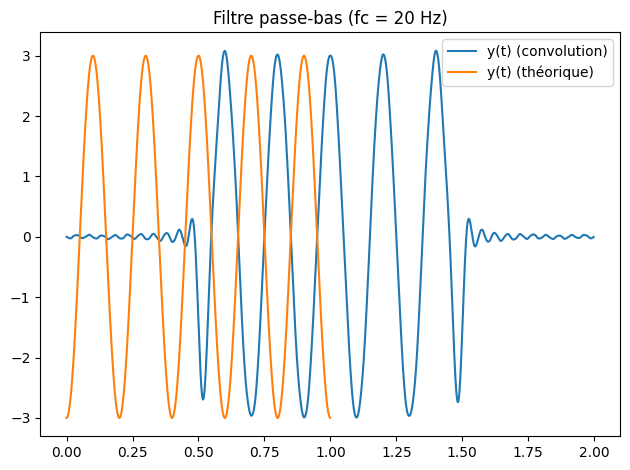

In [17]:
# A COMPLETER
# Convolution de x(t) avec h(t) recentré et comparaison graphique avec y(t) théorique
y = np.convolve(x,h_centered)

# Après convolution, la fréquence d'échantillonage ne varie pas
# De ce fait, on peut retrouver l'axe temporel de y en fonction de la taille du tableau, et le temps d'échantillonage
t_y = np.arange(0,len(y)*Te,Te) 

parameters_y_theorique = [[5, 3, -np.pi/2]]
y_theorique = somme_sinus(t,parameters_y_theorique)

# Affichage des signaux
plt.figure()
plt.plot(t_y,y,label='y(t) (convolution)')
plt.plot(t,y_theorique,label='y(t) (théorique)')
plt.legend()
plt.title("Filtre passe-bas (fc = 20 Hz)")
plt.tight_layout()
plt.show()

Le résultat obtenu est normalement meilleur, mais il reste un détail : le signal convolué est toujours plus long que le théorique. 

Pour mieux comparer les deux signaux, on va utiliser l'option 'same' de np.convolve, qui préserve la taille du signal $x(t)$ après convolution, en récupérant les valeurs centrales de la convolution.

Répétez l'opération en précisant l'option 'same' et affichez le résultat final.

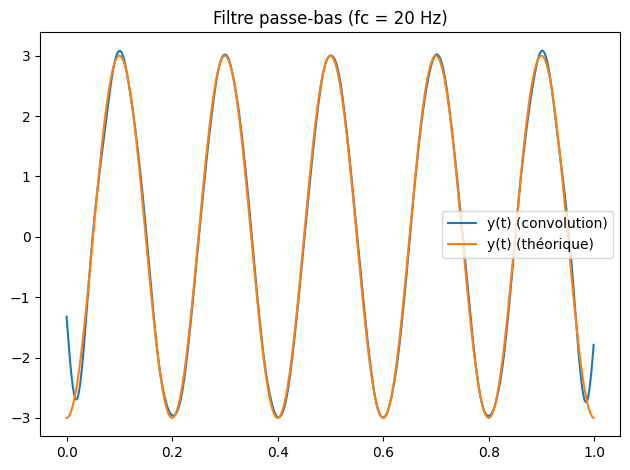

In [18]:
# A COMPLETER
# Convolution de x(t) avec h(t) recentré (avec l'option same dans la convolution) et comparaison graphique avec y(t) théorique
y = np.convolve(x,h_centered,'same')

t_y = np.arange(0,len(y)*Te,Te) 

# Affichage des signaux
plt.figure()
plt.plot(t_y,y,label='y(t) (convolution)')
plt.plot(t,y_theorique,label='y(t) (théorique)')
plt.legend()
plt.title("Filtre passe-bas (fc = 20 Hz)")
plt.tight_layout()
plt.show()

Vous devriez avoir deux courbes très similaires. Les imprécisions obtenues sont liées à la discrétisation du signal, à sa quantification fréquentielle (i.e. l'écart entre chaque échantillon fréquentiel dans la transformée de Fourier), pouvant ainsi causer une fuite spectrale.

Cependant, en réalité, on utilise l'option 'same' uniquement pour une comparaison offline alignée sur l'entrée, c'est-à-dire **lorsqu'on qu'on conçoit un filtre** et le compare par rapport à l'entrée pour vérifier que notre paramétrage est correct. On ne peut faire une telle convolution en temps réel, car cela implique d'avoir notre signal d'entrée au complet.

De ce fait, pour avoir la réelle valeur de la convolution (comme si on traitait le signal en direct), on fait une convolution en gardant l'option par défaut ('full'), et on garde les $N$ premières valeurs (la taille de $x(t)$).

Reprenez la convolution effectuée précédemment et modifiez le code pour faire une convolution 'full' et gardez uniquement les $N$ premières valeurs obtenues. Affichez ensuite le signal convolué avec le signal $y(t)$ théorique.

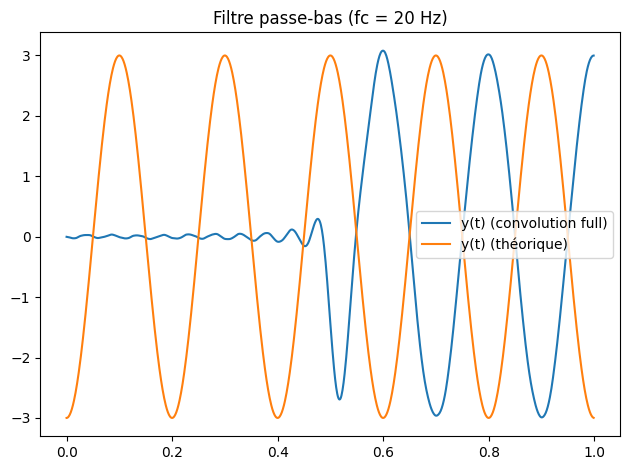

In [19]:
# A COMPLETER
# Convolution 'full' de x(t) avec h(t) recentré (en ne gardant que les N premières valeurs)
# et comparaison graphique avec y(t) théorique
N = len(x)
y = np.convolve(x,h_centered,'full')[:N]

# Affichage des signaux
plt.figure()
plt.plot(t,y,label='y(t) (convolution full)')
plt.plot(t,y_theorique,label='y(t) (théorique)')
plt.legend()
plt.title("Filtre passe-bas (fc = 20 Hz)")
plt.tight_layout()
plt.show()

Vous devriez constater que dans un premier temps, le signal convolué ne ressemble pas au signal théorique. C'est seulement à partir d'un moment (précisément à $\frac{M}{2}$ avec $M$ la taille de $h$) que le signal convolué ressemble au signal théorique, mais avec un retard de $\frac{M}{2}$. De ce fait, en temps réel, vous avez toujours un retard dans le signal convolué par rapport à l'entrée, correspondant à la moitié de la taille de $h(t)$.

Ici, le retard paraît énorme, mais c'est parce que vous avez deux signaux de même taille (1 seconde). Modifiez cette fois $x(t)$ pour qu'il évolue durant 5 secondes, et revisualisez le résultat de la convolution par rapport au signal $y(t)$ théorique.

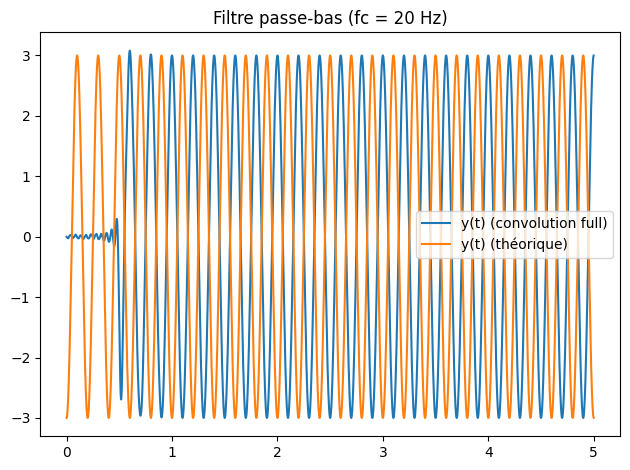

In [20]:
# A COMPLETER
# Convolution de x(t) (évoluant de 0 à 5 secondes) avec h(t) recentré et comparaison graphique avec y(t) théorique

Te = 0.001
t = np.arange(0,5,Te)

parameters_x = [[5, 3, -np.pi/2],
                [50, 1, np.pi/3],
                [100, 0.5, 0],
                [200, 0.1, np.pi/6]]

x = somme_sinus(t, parameters_x)

N = len(x)
y = np.convolve(x,h_centered,'full')[:N]

parameters_y_theorique = [[5, 3, -np.pi/2]]
y_theorique = somme_sinus(t,parameters_y_theorique)

# Affichage des signaux
plt.figure()
plt.plot(t,y,label='y(t) (convolution full)')
plt.plot(t,y_theorique,label='y(t) (théorique)')
plt.legend()
plt.title("Filtre passe-bas (fc = 20 Hz)")
plt.tight_layout()
plt.show()

Voilà ! Ici, on a reproduit le filtrage réel d'un signal... mais avec un filtre idéal... euh... c'est bizarre non ?

En effet, normalement, on ne peut pas filtrer en temps réel avec un filtre idéal, du fait de la non causalité. Cependant, lorsqu'on a calculé la transformée de Fourier inverse de $H(f)$, on a en réalité perdu la propriété du filtre idéal, et c'est devenu un filtre réel de type RIF, c'est-à-dire à Réponse Impulsionnelle Finie (vous verrez ça vers la fin du semestre). En théorie, la transformée de Fourier inverse d'un signal porte évolue sur un temps infini, hors notre FFT inverse le replace dans un temps fini. De ce fait, ce n'est plus un filtre idéal. 

De plus, le calcul de la convolution via np.convolve se fait indépendamment du temps. On passe en entrée des tableaux, sans indice temporel, ce qui fait que le filtre, qu'il soit causal ou non, donne finalement le même résultat.

---

**_CE QU'IL FAUT RETENIR APRES CES DEUX EXERCICES :_**

On a vu beaucoup de choses ici, ce qui peut paraître confus. Voici donc un récapitulatif à retenir :
- Les filtres idéaux sont applicables en numérique, mais cela nécessite d'avoir le signal en entier, donc c'est non applicable en temps réel
- Un filtre idéal s'applique en fréquentiel par multiplication: $Y(f) = X(f) \cdot H(f)$
- La transformée de Fourier inverse du filtre idéal change la nature du filtre, qui ne devient plus idéal
- Pour les filtres réels, nous verrons cela plus tard (en fin de semestre), car il faut d'abord qu'on regarde plus en détail le fonctionnement des transformées de Fourier discrètes.

---

## Exercice 3 : Une séparation difficile, mais nécessaire...

Pour ce dernier exercice, vous avez un audio à votre disposition. Pas de bruit, pas de soucis, c'est l'original. Ecoutez-le dans un premier temps.

**_QUESTION :_** Combien d'instruments/parties identifiez-vous dans l'audio ? Sont-ils tous bien distinguables des autres ?

**_REPONSE :_**

Chargez l'audio et affichez le signal

Fréquence d'échantillonage de l'audio : 44100 Hz


C:\Users\Robin\AppData\Local\Temp\ipykernel_253296\2175544033.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  freq_audio, extrait_audio = wavfile.read("audio_2.wav")


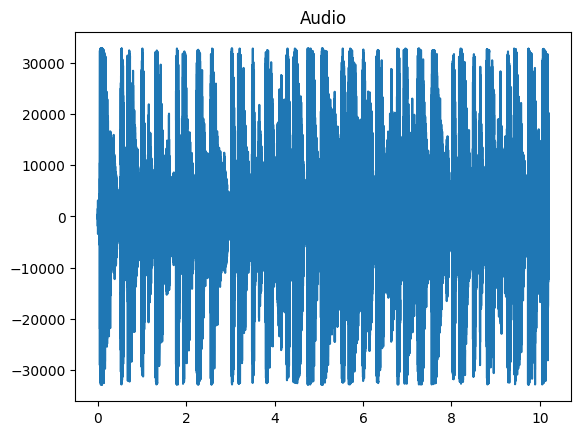

In [21]:
# A COMPLETER
# Chargement de l'extrait audio
from scipy.io import wavfile
freq_audio, extrait_audio = wavfile.read("audio_2.wav")
print(f"Fréquence d'échantillonage de l'audio : {freq_audio} Hz")

# Reconstruction de l'axe temporel
t_extrait_audio = np.arange(0, len(extrait_audio)/freq_audio, 1/freq_audio)

# Tracé du signal audio
plt.plot(t_extrait_audio, extrait_audio)
plt.title("Audio")
plt.show()

L'objectif du jour va être d'isoler au mieux les instruments que vous entendez, afin de créer des pistes audios séparées. Pour cela, vous avez vos filtres idéaux à votre disposition. A vous de créer un audio avec uniquement la basse, un autre avec les percussions, un autre avec la mélodie, etc.

In [22]:
# A COMPLETER
# Extraction des différentes éléments de l'audio par filtrage et enregistrement dans des sous-fichiers WAV
...

Ellipsis

**_QUESTION :_** Est-ce que vos extractions de pistes audios sont satisfaisantes ?

**_REPONSE :_**